# All imports necessary

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys

In [3]:
sys.path.append('..')

In [4]:
import os

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
from source.code.utils.utils import filter_by_subcorpus
from source.code.utils.utils import get_tagged_texts_as_pd

from source.code.transformers.sentenceextractor import SentenceExtractor
from source.code.models.memorytagger import MemoryTagger
from source.code.models.bilstmtagger import BiLSTMTagger

from source.code.utils.preprocessing import filtrations
from source.code.utils.preprocessing import additional_features
from source.code.utils.preprocessing import crf_pre_processing

Using TensorFlow backend.


In [8]:
from sklearn_crfsuite.metrics import flat_classification_report as crfsuite_classification_report

from sklearn_crfsuite import metrics

from sklearn_crfsuite import CRF as sklearn_crf

In [136]:
from seqeval.metrics import classification_report as seqeval_classification_report

In [11]:
from sklearn.metrics import classification_report as sklearn_classification_report

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

In [12]:
from keras.preprocessing.sequence import pad_sequences

In [13]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

In [15]:
sns.set(color_codes=True)

In [16]:
sns.set(font_scale=2)

In [17]:
%matplotlib inline

In [18]:
features = ['semantic_relation_tagged', 'animacy_tagged', 'lambda_dsr_len', 'word_sense_exists', 'is_title', 'contains_digits', 'word_len']
target = 'ner_tag'

In [19]:
pd.set_option('display.max_rows', 30000)

# Naive tag frequency memorization

In [ ]:
target_subcorpus_folders = filter_by_subcorpus('../data/datasets/gmb-2.2.0/', 'subcorpus: Voice of America')

In [ ]:
X = get_tagged_texts_as_pd(target_subcorpus_folders, '../data/datasets/gmb-2.2.0/')

In [ ]:
X.ner_tag.value_counts()

In [ ]:
X = filtrations(X)

In [ ]:
X.ner_tag.value_counts()

In [ ]:
X = additional_features(X)

In [ ]:
X.info()

In [ ]:
X, y = X.token, X.ner_tag

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
estimator = MemoryTagger()

In [ ]:
scores = cross_val_score(estimator, X_train, y_train, cv=5, verbose=True, n_jobs=-1)

In [ ]:
scores

In [ ]:
estimator.fit(X_train, y_train)

In [ ]:
sklearn_report = sklearn_classification_report(y_pred=estimator.predict(X_test), y_true=y_test)
print(sklearn_report)

# Random Forest Classifier

In [ ]:
target_subcorpus_folders = filter_by_subcorpus('../data/datasets/gmb-2.2.0/', 'subcorpus: Voice of America')

In [ ]:
X = get_tagged_texts_as_pd(target_subcorpus_folders, '../data/datasets/gmb-2.2.0/')

In [ ]:
X.ner_tag.value_counts()

In [ ]:
X = filtrations(X)

In [ ]:
X.ner_tag.value_counts()

In [ ]:
X = additional_features(X)

In [ ]:
X.info()

In [ ]:
X, y = X[features], X[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
estimator = RandomForestClassifier()

In [ ]:
scores = cross_val_score(estimator, X_train, y_train, cv=5, verbose=True, n_jobs=-1)

In [ ]:
scores

In [ ]:
estimator.fit(X_train, y_train)

In [ ]:
report = sklearn_classification_report(y_pred=estimator.predict(X_test), y_true=y_test)
print(report)

# HMM

[This article](https://pdfs.semanticscholar.org/9528/4b31f27b9b8901fdc18554603610ebbc2752.pdf)  gives a full description of how to calculate parameters for Hidden Markov Model.

From [this article](https://www.digitalvidya.com/blog/inroduction-to-hidden-markov-models-using-python/) we have taken Viterbi algorithm.

But first let's read the data again.

In [20]:
target_subcorpus_folders = filter_by_subcorpus('../data/datasets/gmb-2.2.0/', 'subcorpus: Voice of America')

In [21]:
X = get_tagged_texts_as_pd(target_subcorpus_folders, '../data/datasets/gmb-2.2.0/')

In [22]:
X.head(30)

,token,pos_tag,lemma,ner_tag,word_net_sense_number,verb_net_roles,semantic_relation,animacy_tag,super_tag,lambda_dsr
0,Former,JJ,former,O,1,[Topic],O,O,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:s1],[b1:[]:r..."
1,Ecuadorean,NNP,ecuadorean,O,0,[],=,Human,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100..."
2,President,NNP,president,per-tit,1,[],=,Human,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100..."
3,Lucio,NNP,lucio,per-nam,0,[],=,Human,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100..."
4,Gutierrez,NNP,gutierrez,per-nam,0,[],O,Human,N,"lam(v1,b1:drs([],[b1:[1005]:named(v1,gutierrez..."
5,has,VBZ,have,O,0,[],O,O,(S[dcl]\NP)/(S[pt]\NP),"lam(v1,lam(v2,lam(v3,app(app(v1,v2),lam(v4,mer..."
6,formally,RB,formally,O,1,[],O,O,(S[dcl]\NP)\(S[dcl]\NP),"lam(v1,lam(v2,lam(v3,app(app(v1,v2),lam(v4,mer..."
7,requested,VBN,request,O,1,"[Topic,Agent]",O,O,(S[pt]\NP)/NP,"lam(v1,lam(v2,lam(v3,app(v2,lam(v4,app(v1,lam(..."
8,political,JJ,political,O,1,[Topic],O,O,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:s1],[b1:[]:r..."
9,asylum,NN,asylum,O,1,[],O,Non-concrete,N,"lam(v1,b1:drs([],[b1:[1010]:pred(v1,asylum,n,'..."


In [23]:
X.ner_tag.value_counts()

O          1032479
geo-nam      55480
org-nam      44646
per-nam      22931
gpe-nam      19685
tim-dow      11398
tim-dat      10929
per-tit       9672
per-fam       8098
[]            4064
tim-moy       3811
tim-yoc       3009
per-giv       2376
tim-clo        810
art-nam        789
eve-nam        514
nat-nam        280
tim-nam        132
eve-ord         63
per-ini         55
per-ord         35
org-leg         13
tim-dom          8
per-mid          1
art-add          1
Name: ner_tag, dtype: int64

Lots of redundant tag additions (like -nam, -dow).

We will work without them:

In [24]:
X = filtrations(X, with_dots=True)

In [25]:
X.head(30)

,token,pos_tag,lemma,ner_tag,word_net_sense_number,verb_net_roles,semantic_relation,animacy_tag,super_tag,lambda_dsr
0,Former,JJ,former,O,1,[Topic],O,O,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:s1],[b1:[]:r..."
1,Ecuadorean,NNP,ecuadorean,O,0,[],=,Human,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100..."
2,President,NNP,president,B-per,1,[],=,Human,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100..."
3,Lucio,NNP,lucio,I-per,0,[],=,Human,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100..."
4,Gutierrez,NNP,gutierrez,I-per,0,[],O,Human,N,"lam(v1,b1:drs([],[b1:[1005]:named(v1,gutierrez..."
6,formally,RB,formally,O,1,[],O,O,(S[dcl]\NP)\(S[dcl]\NP),"lam(v1,lam(v2,lam(v3,app(app(v1,v2),lam(v4,mer..."
7,requested,VBN,request,O,1,"[Topic,Agent]",O,O,(S[pt]\NP)/NP,"lam(v1,lam(v2,lam(v3,app(v2,lam(v4,app(v1,lam(..."
8,political,JJ,political,O,1,[Topic],O,O,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:s1],[b1:[]:r..."
9,asylum,NN,asylum,O,1,[],O,Non-concrete,N,"lam(v1,b1:drs([],[b1:[1010]:pred(v1,asylum,n,'..."
11,Colombia,NNP,colombia,B-geo,1,[],O,Place,N,"lam(v1,b1:drs([],[b1:[1012]:named(v1,colombia,..."


In [26]:
X.ner_tag.value_counts()

O        590495
B-geo     42533
B-org     23134
B-tim     22603
I-per     22211
B-per     20861
I-org     19331
B-gpe     19104
I-geo     12438
I-tim      5481
I-gpe       579
B-art       409
I-art       322
B-eve       310
I-eve       248
B-nat       208
I-nat        72
Name: ner_tag, dtype: int64

In [27]:
X.ner_tag.nunique()

17

The approach proposed in the article mentioned above is divided into three steps:
- Data preparation;
- Parameter estimation (or training);
- Usage of parameters estimated (or testing).

## Step 1: Data preparation

In [28]:
X, y = SentenceExtractor().fit_transform(X)

In [29]:
lemma_sentence_lenghts = list(map(len, X))

In [30]:
tag_sentence_lenghts = list(map(len, y))

In [31]:
max(lemma_sentence_lenghts)

61

In [32]:
max(tag_sentence_lenghts)

61

In [33]:
all(len_lemmas == len_tags for len_lemmas, len_tags in zip(lemma_sentence_lenghts, tag_sentence_lenghts))

True

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Step 2: HMM Parameter Estimation

### Step 2.1: Find states.

In [96]:
states = list(set([tag for sentence in y_train for tag in sentence]))
tag2idx = {t: i for i, t in enumerate(states)}
idx2tag = {i: w for w, i in tag2idx.items()}

In [97]:
len(states)

17

In [98]:
states

['I-per',
 'I-eve',
 'I-gpe',
 'B-art',
 'B-tim',
 'B-nat',
 'B-gpe',
 'I-tim',
 'O',
 'B-org',
 'I-geo',
 'B-eve',
 'I-art',
 'B-geo',
 'I-nat',
 'I-org',
 'B-per']

### Step 2.2: Calculate Start probability (π)

In [99]:
pi = np.zeros(len(states))

In [100]:
for sentence in y_train:
    if len(sentence) > 0:
        pi[tag2idx[sentence[0]]] += 1

In [101]:
pi = pi / len(y_train)

### Step 2.3: Calculate transition probability (A)

In [102]:
A = np.zeros((len(states), len(states)))
A_i = np.zeros(len(states))

In [103]:
for i in range(len(y_train)):
    if len(y_train[i]) > 1:
        for j in range(len(y_train[i]) - 1):
            A[tag2idx[y_train[i][j]]][tag2idx[y_train[i][j + 1]]] += 1
            A_i[tag2idx[y_train[i][j]]] += 1
        A_i[tag2idx[y_train[i][len(y_train[i]) - 1]]] += 1
for i in range(len(states)):
    A[i] = A[i] / A_i[i]

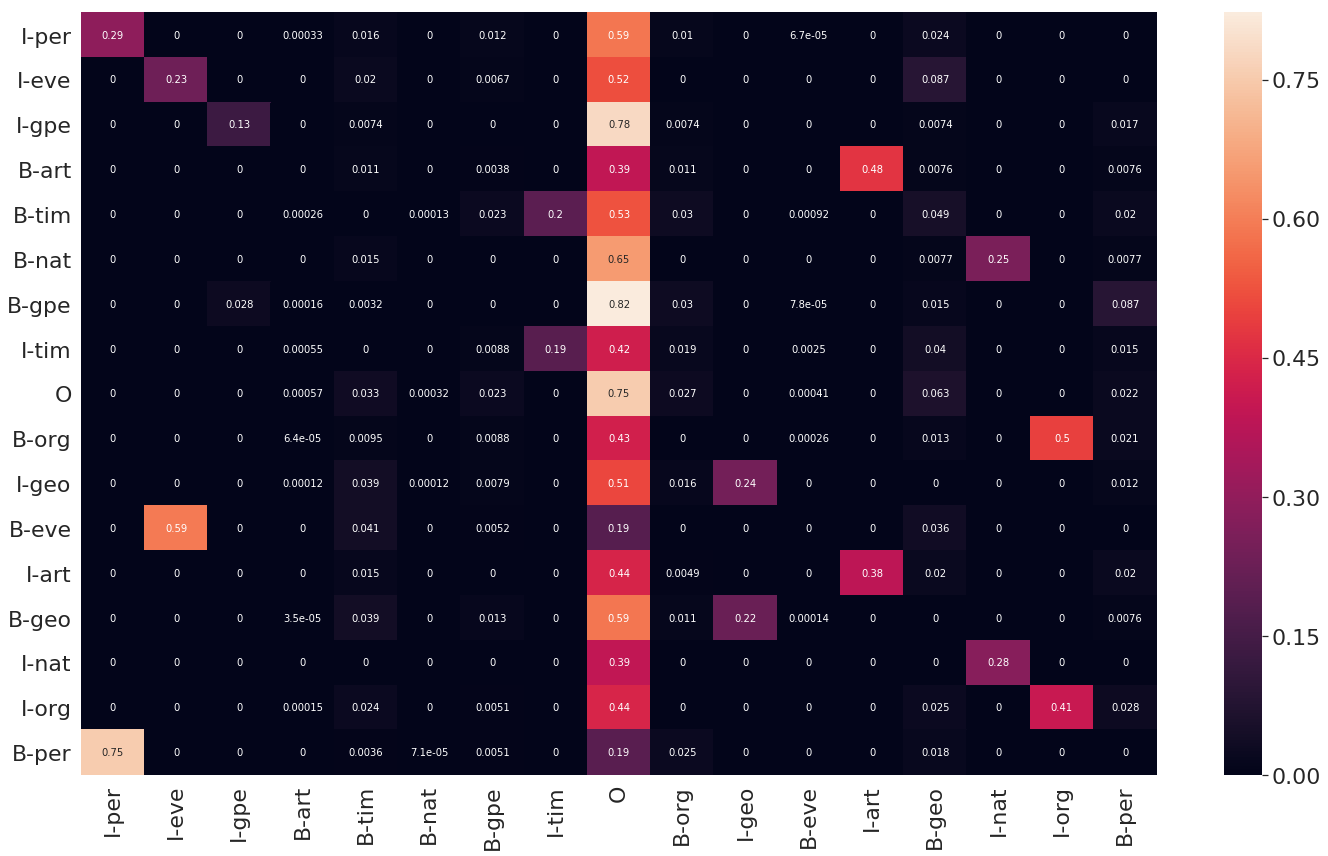

In [104]:
plt.figure(figsize=(20, 12))
sns.heatmap(A, annot=True, xticklabels=states, yticklabels=states, fmt='.2g')
plt.tight_layout()
plt.show()

### Step 2.4: Calculate emission probability (B)

In [105]:
words = list(set([word for sentence in X_train for word in sentence]))
words.append('unknown_word')
word2idx = {t: i for i, t in enumerate(words)}
idx2word = {i: w for w, i in word2idx.items()}

In [106]:
len(words)

22896

In [107]:
B = np.zeros((len(words), len(states)))
B_i = np.zeros(len(states))

In [108]:
for i in range(len(X_train)):
    if len(X_train[i]) > 0:
        for j in range(len(X_train[i])):
            B[
                word2idx[
                    X_train[i][j]
                ]
            ][
                tag2idx[
                    y_train[i][j]
                ]
            ] += 1
            B_i[tag2idx[y_train[i][j]]] += 1
for i in range(len(states)):
    B[:, i] = B[:, i] / B_i[i]

In [109]:
np.shape(pi)

(17,)

In [110]:
np.shape(A)

(17, 17)

In [111]:
np.shape(B.T)

(17, 22896)

## Step 3: Testing

### Step 3.1: Viterby implementation

In [123]:
def viterbi(pi, A, B, obs):
    nStates = np.shape(B)[0]
    T = np.shape(obs)[0]
    path = np.zeros(T)
    delta = np.zeros((nStates, T))
    phi = np.zeros((nStates, T))

    try:
        delta[:, 0] = pi * B[:, obs[0]]
        phi[:, 0] = 0
    except:
        print('\t', len(obs))

    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t - 1] * A[:, s]) * B[s, obs[t]]
            phi[s, t] = np.argmax(delta[:, t - 1] * A[:, s])

    path[T - 1] = np.argmax(delta[:, T - 1])
    for t in range(T - 2, -1, -1):
        #path[t] = phi[int(path[t+1]): int(t+1) , int(t+1)]
        path[t] = phi[int(path[t + 1]) , int(t + 1)]

    return path, delta, phi

In [113]:
X_test_num = [[word2idx[word] if word in word2idx else word2idx['unknown_word'] for word in sentence] for sentence in X_test]

In [128]:
X_test_num = [sentence for sentence in X_test_num if len(sentence) > 0]

In [144]:
y_test = [sentence.tolist() for sentence in y_test if len(sentence) > 0]

In [133]:
y_pred = []
for sentence in X_test_num:
    path, _, _ = viterbi(pi, A, B.T, sentence)
    y_pred.append([idx2tag[step] for step in path])

In [134]:
crfsuite_report = crfsuite_classification_report(y_pred=y_pred, y_true=y_test)
print(crfsuite_report)

              precision    recall  f1-score   support

       B-art       0.33      0.21      0.25       146
       B-eve       0.18      0.16      0.17       116
       B-geo       0.74      0.58      0.65     13941
       B-gpe       0.62      0.63      0.62      6329
       B-nat       0.30      0.29      0.30        78
       B-org       0.75      0.51      0.61      7629
       B-per       0.69      0.70      0.70      6861
       B-tim       0.92      0.66      0.77      7456
       I-art       0.15      0.12      0.13       119
       I-eve       0.18      0.22      0.20        98
       I-geo       0.69      0.62      0.65      3999
       I-gpe       0.45      0.44      0.45       172
       I-nat       0.25      0.65      0.36        26
       I-org       0.66      0.49      0.56      6375
       I-per       0.14      0.94      0.24      7271
       I-tim       0.79      0.53      0.64      1846
           O       0.97      0.79      0.87    175612

   micro avg       0.75   

In [146]:
seqeval_report = seqeval_classification_report(y_pred=y_pred, y_true=y_test)
print(seqeval_report)

             precision    recall  f1-score   support

        geo       0.71      0.56      0.62     13941
        per       0.42      0.53      0.47      6861
        tim       0.88      0.63      0.74      7456
        org       0.64      0.44      0.52      7629
        gpe       0.62      0.63      0.62      6329
        art       0.27      0.17      0.21       146
        eve       0.17      0.15      0.16       116
        nat       0.28      0.27      0.27        78

avg / total       0.66      0.55      0.60     42556



# CRF

In [ ]:
target_subcorpus_folders = filter_by_subcorpus('../data/datasets/gmb-2.2.0/', 'subcorpus: Voice of America')

In [ ]:
X = get_tagged_texts_as_pd(target_subcorpus_folders, '../data/datasets/gmb-2.2.0/')

In [ ]:
X.ner_tag.value_counts()

In [ ]:
X = filtrations(X, with_dots=True)

In [ ]:
X.ner_tag.value_counts()

In [ ]:
X = additional_features(X)

In [ ]:
X.info()

In [ ]:
X, y = crf_filtration_and_pre_processing(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
estimator = sklearn_crf(algorithm='lbfgs', c1=0.1, c2=0.1, max_iterations=100, all_possible_transitions=False)

In [ ]:
scores = cross_val_score(estimator, X_train, y_train, cv=5, verbose=True, n_jobs=-1)

In [ ]:
scores

In [ ]:
estimator.fit(X_train, y_train)

In [ ]:
report = crfsuite_classification_report(y_pred=estimator.predict(X_test), y_true=y_test)
print(report)

# Bi-LSTM

In [ ]:
target_subcorpus_folders = filter_by_subcorpus('../data/datasets/gmb-2.2.0/', 'subcorpus: Voice of America')

In [ ]:
X = get_tagged_texts_as_pd(target_subcorpus_folders, '../data/datasets/gmb-2.2.0/')

In [ ]:
X.head(30)

In [ ]:
X.ner_tag.value_counts()

In [ ]:
X = filtrations(X, with_dots=True)

In [ ]:
X.ner_tag.value_counts()

In [ ]:
X.ner_tag.nunique()

In [ ]:
X, y = SentenceExtractor().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
estimator = BiLSTMTagger(checkpoint_dir='../data/datasets/keras_model/')

In [ ]:
estimator.fit(X_train, y_train)

In [ ]:
y_pred = estimator.predict(X_test)

In [ ]:
y_test = [[estimator.tag2idx[w] for w in s] for s in y_test]
y_test = pad_sequences(maxlen=75, sequences=y_test, padding="post", value=estimator.tag2idx["O"])
y_test = [[estimator.idx2tag[w] for w in s] for s in y_test]

In [ ]:
crfsuite_report = crfsuite_classification_report(y_pred=y_pred, y_true=y_test)
print(crfsuite_report)

In [ ]:
seqeval_report = seqeval_classification_report(y_pred=y_pred, y_true=y_test)
print(seqeval_report)

# Conclusion